In [2]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import * 
from sklearn.svm import SVC , SVR
from sklearn.preprocessing import StandardScaler
import sys
import sklearn
import matplotlib
# z = (x - u) / s

In [13]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
Scipy: 1.11.4
Numpy: 1.26.3
Pandas: 2.1.4
Matplotlib: 3.8.2
Seaborn: 0.12.2
Sklearn: 1.4.0


In [31]:
dataset = pd.read_csv('iris_data.csv',names=['sepal-length','sepal-width','patel-length','patel-width','class'])
dataset



sepal-length  sepal-width  patel-length  patel-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [32]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [17]:
dataset.describe()

sepal-length  sepal-width  patel-length  patel-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<Axes: >

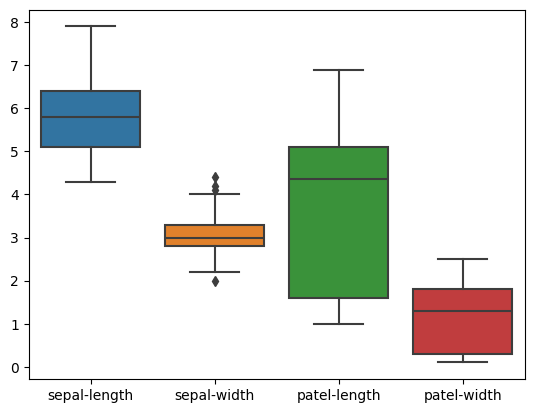

In [18]:
sns.boxplot(dataset)

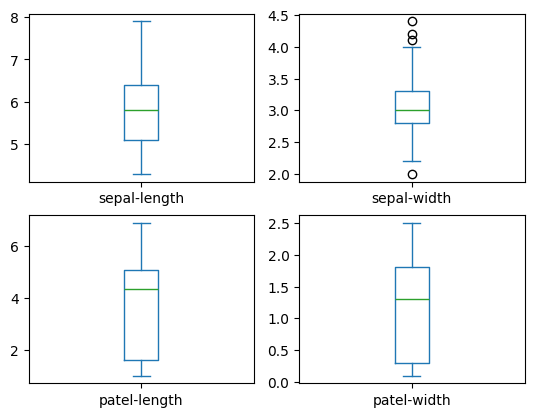

In [19]:
dataset.plot(kind='box',subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

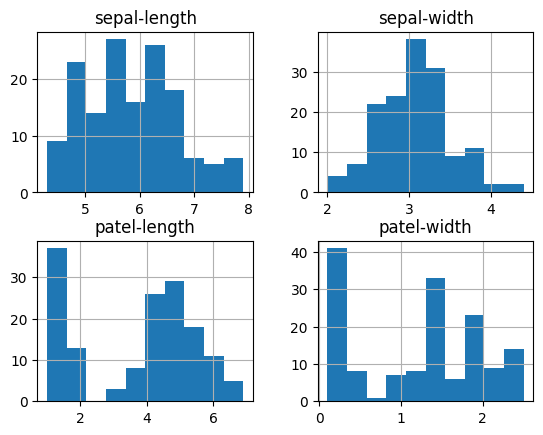

In [25]:
dataset.hist()
plt.show()

In [29]:
# plt.hist(x='sepal-length',y='petel-length',data=dataset)

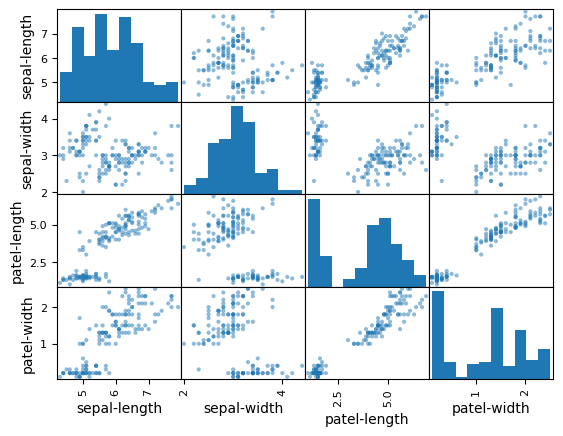

In [4]:
scatter_matrix(dataset)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

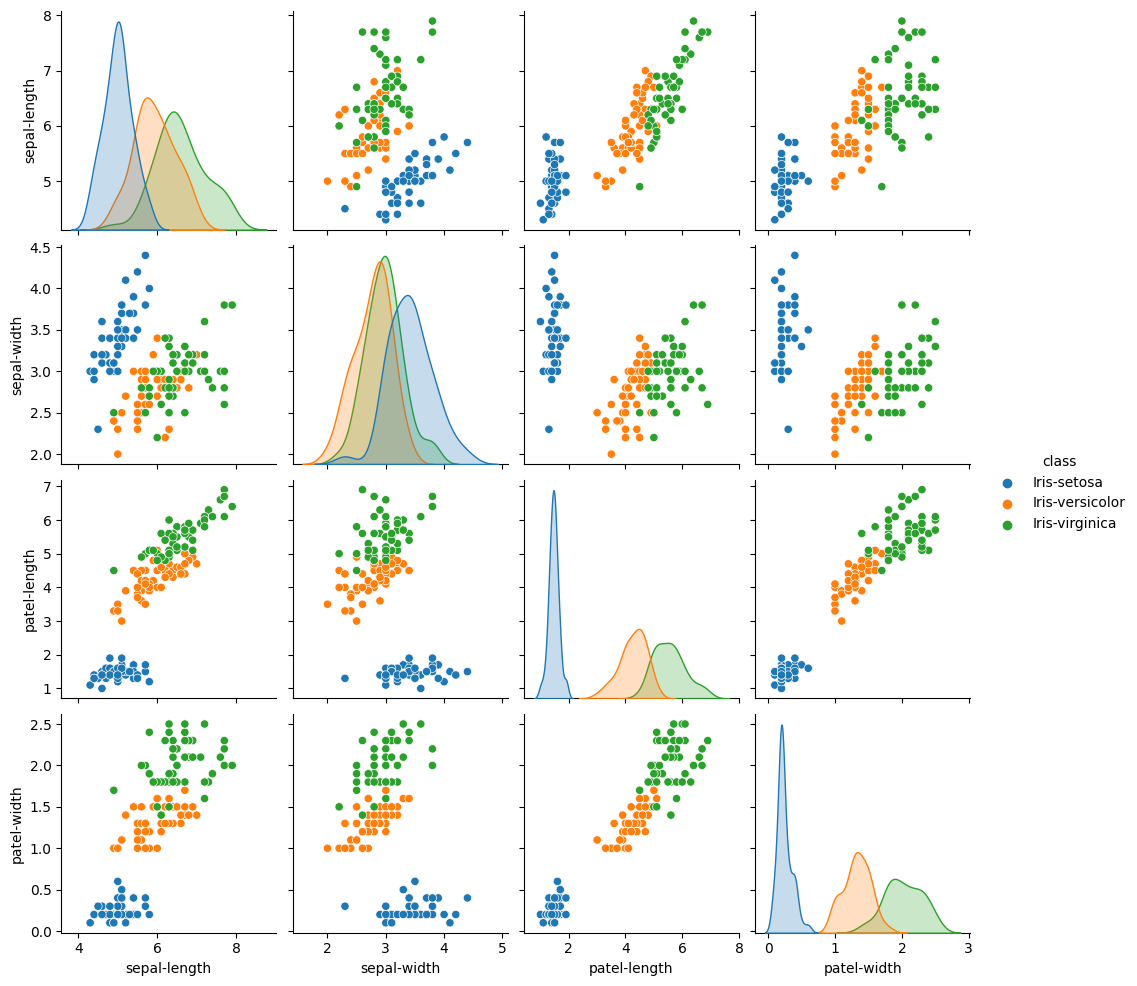

In [30]:
sns.pairplot(data=dataset,hue='class')

In [34]:
# divided data into train is 80% and test is 20% 
dataset = dataset.values
x = dataset[:,0:4]
y = dataset[:,4]
validation_size = 0.20
seed = 7  # 6
scoring = 'accuracy'
# print(x,y)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=validation_size,random_state = seed)

In [42]:
# For Random Forest Classifier (used for classification tasks)
from sklearn.ensemble import RandomForestClassifier

# For Random Forest Regressor (used for regression tasks)
from sklearn.ensemble import RandomForestRegressor

In [38]:
# For classification
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(x_train, y_train)

# For regression
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(x_train, y_train)

In [47]:
#spot check algorithms
models=[]
#models.append(('LinearRegression:',LinearRegression()))
models.append(('LR:',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA:',LinearDiscriminantAnalysis()))
models.append(('KNN:',KNeighborsClassifier()))
models.append(('DTC(CART:)',DecisionTreeClassifier()))
#models.append(('DTR:',DecisionTreeRegressor()))
models.append(('RFC: ',RandomForestClassifier(n_estimators=100)))
# models.append(('RFR: ',RandomForestRegressor(n_estimators=100)))
models.append(('NB:',GaussianNB()))
models.append(('SVC',SVC(gamma='auto')))

results =[]
names = []

for name,model in models:
    kfold = KFold(n_splits = 10, random_state = seed,shuffle=True)
    
    cv_results = cross_val_score(model,x_train,y_train,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
#End for loop 

LR: : 0.958333 (0.055902)
LDA: : 0.975000 (0.038188)
KNN: : 0.983333 (0.033333)
DTC(CART:) : 0.950000 (0.076376)
RFC:  : 0.966667 (0.040825)
NB: : 0.966667 (0.040825)
SVC : 0.991667 (0.025000)


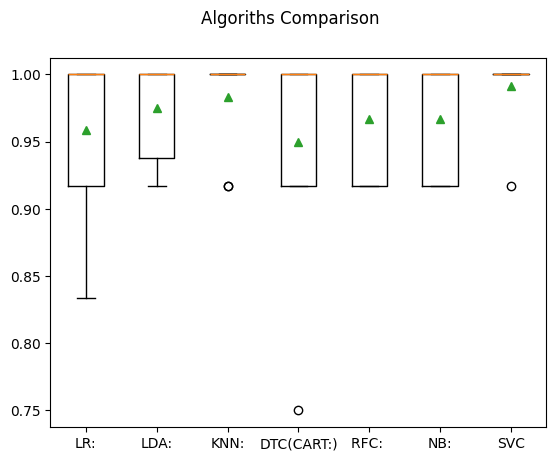

In [48]:
# comparing Algorithms and select the best model 
fig = plt.figure()
fig.suptitle('Algoriths Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

In [49]:
#make Prediction 
svm = SVC(gamma ='auto')
svm.fit(x_train,y_train)
pre_y = svm.predict(x_test)
print(accuracy_score(y_test,pre_y))
print(confusion_matrix(y_test,pre_y))
print(classification_report(y_test,pre_y))


0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pre_y = knn.predict(x_test)
print(accuracy_score(y_test,pre_y))
print(confusion_matrix(y_test,pre_y))
print(classification_report(y_test,pre_y))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [51]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score,mean_squared_error as mse


iris_data = datasets.load_iris()
# split data into training or testing set

x,y = iris_data.data,iris_data.target
# print(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

# plt.scatter(x_train, y_train) # x_test, y_pred
# #plt.plot(x_train,y_train)  # x_test,y_test
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions")
# plt.show()



accuracy_score: 1.0


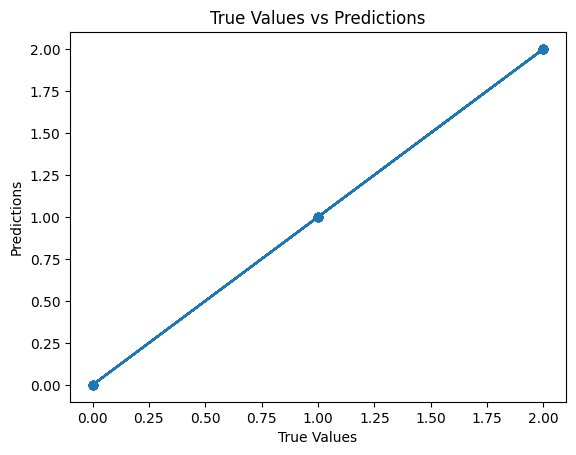

In [54]:
#train Model ...........
Lr = linear_model.LinearRegression()
Lg = linear_model.LogisticRegression()

Lr.fit(x_train,y_train)
Lg.fit(x_train,y_train)

# test accuracy score
y_pred = Lg.predict(x_test)
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)  # x_test,
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


Mean Squared Error: 0.0


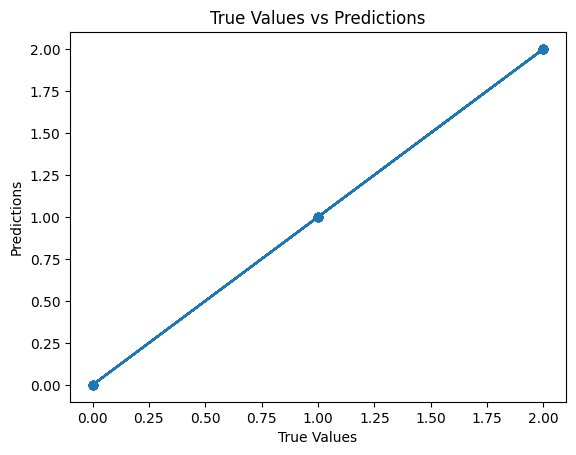

In [55]:
print(f"Mean Squared Error: {mse(y_test,y_pred)}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


accuracy_score Error: 1.0


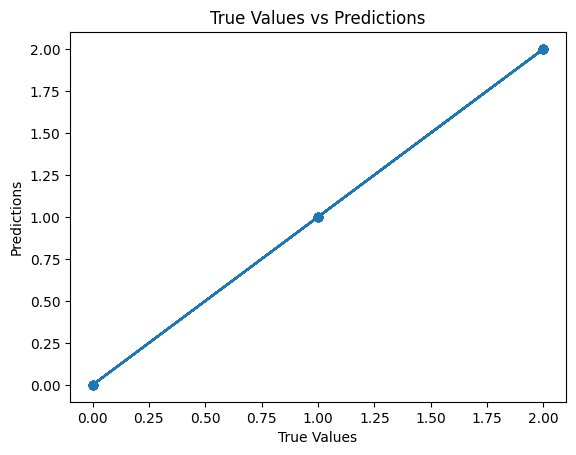

In [14]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

Dt = DecisionTreeRegressor()
Dt.fit(x_train,y_train)

y_pred = Dt.predict(x_test)
print(f"accuracy_score Error: {accuracy_score(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 0.0


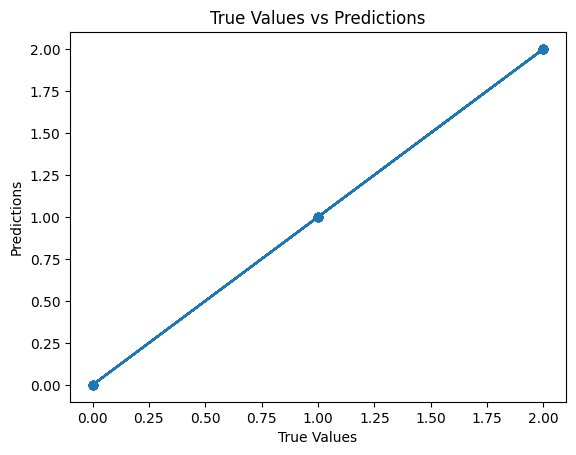

In [56]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

Dt = DecisionTreeRegressor()
Dt.fit(x_train,y_train)

y_pred = Dt.predict(x_test)
print(f"Mean Squared Error: {mse(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Accuracy: 1.0


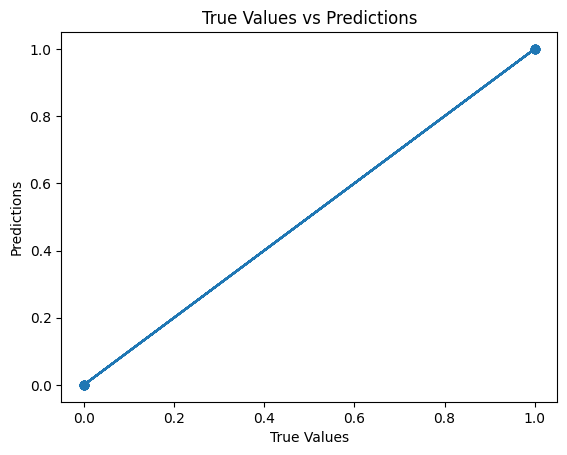

In [57]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset and use only two classes: setosa and versicolor for binary classification
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 2900.19362849348


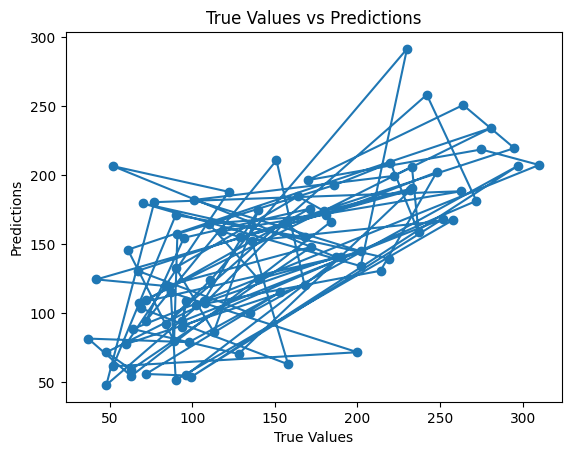

In [58]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score,mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Features (X) and target (y)
X, y = diabetes.data, diabetes.target


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression,LogisticRegression

model = LinearRegression()
# model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# accuracy_score = accuracy_score(y_test, y_pred)
# print(f"Accuracy Score: {accuracy_score}")
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 2065.425563237292


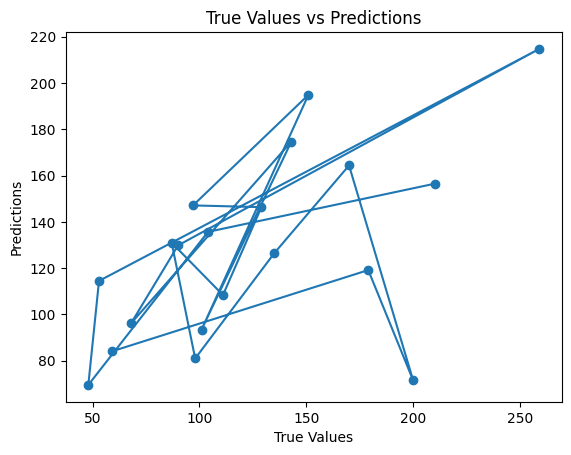

In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error as mse

# Load diabetes dataset and use only two classes: setosa and versicolor for binary classification
disease = datasets.load_diabetes()
X = disease.data[:100]
y = disease.target[:100]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
Lg = LinearRegression()
Lg.fit(X_train, y_train)

# Predict on test set
y_pred = Lg.predict(X_test)

# Measure accuracy
accuracy = mse(y_test, y_pred)
print("Mean Squared Error:", accuracy)

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [70]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error as mse

disease = datasets.load_diabetes()

#disease
disease_x = disease.data[:,np.newaxis,2]
#disease_x = disease.data

#splitting the data into training or testing 
disease_x_train = disease_x[:-30]
disease_x_test = disease_x[-20:]

disease_y_train = disease.target[:-30]
disease_y_test = disease.target[-20:]

reg = linear_model.LinearRegression()
reg.fit(disease_x_train,disease_y_train)

#disease_x_test.size
# disease_y_test.size

y_pred = reg.predict(disease_x_test)
mse = mse(disease_y_test,y_pred)
mae = mean_absolute_error(disease_y_test,y_pred)

print(f'Mean Squared Errro:{mse}')

print(f'Mean Absolute Errro:{mae}')

weight = reg.coef_
intercept = reg.intercept_

print(weight,intercept)

Mean Squared Errro:2561.320427728385
Mean Absolute Errro:41.34577292446437
[941.43097333] 153.39713623331644


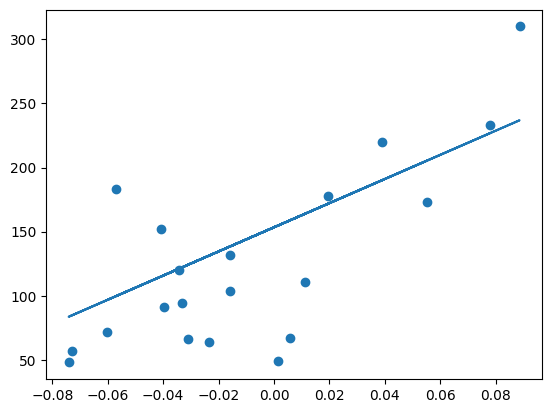

In [71]:
plt.scatter(disease_x_test,disease_y_test)
plt.plot(disease_x_test,y_pred)
plt.show()

In [24]:
# Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [72]:
iris = sns.load_dataset('iris')
#iris = pd.read_csv('Iris.csv')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [73]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
iris.isnull().any()
iris.shape

(150, 5)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

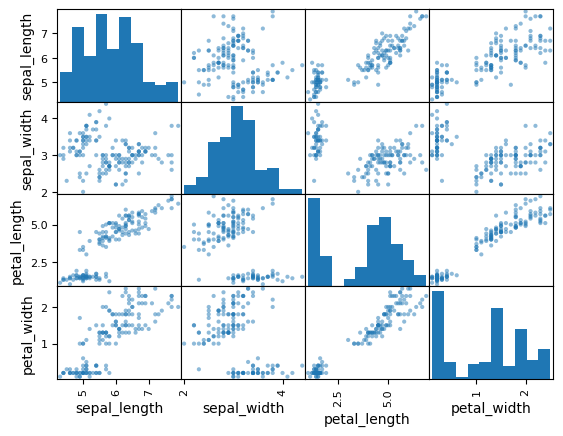

In [75]:
scatter_matrix(iris)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

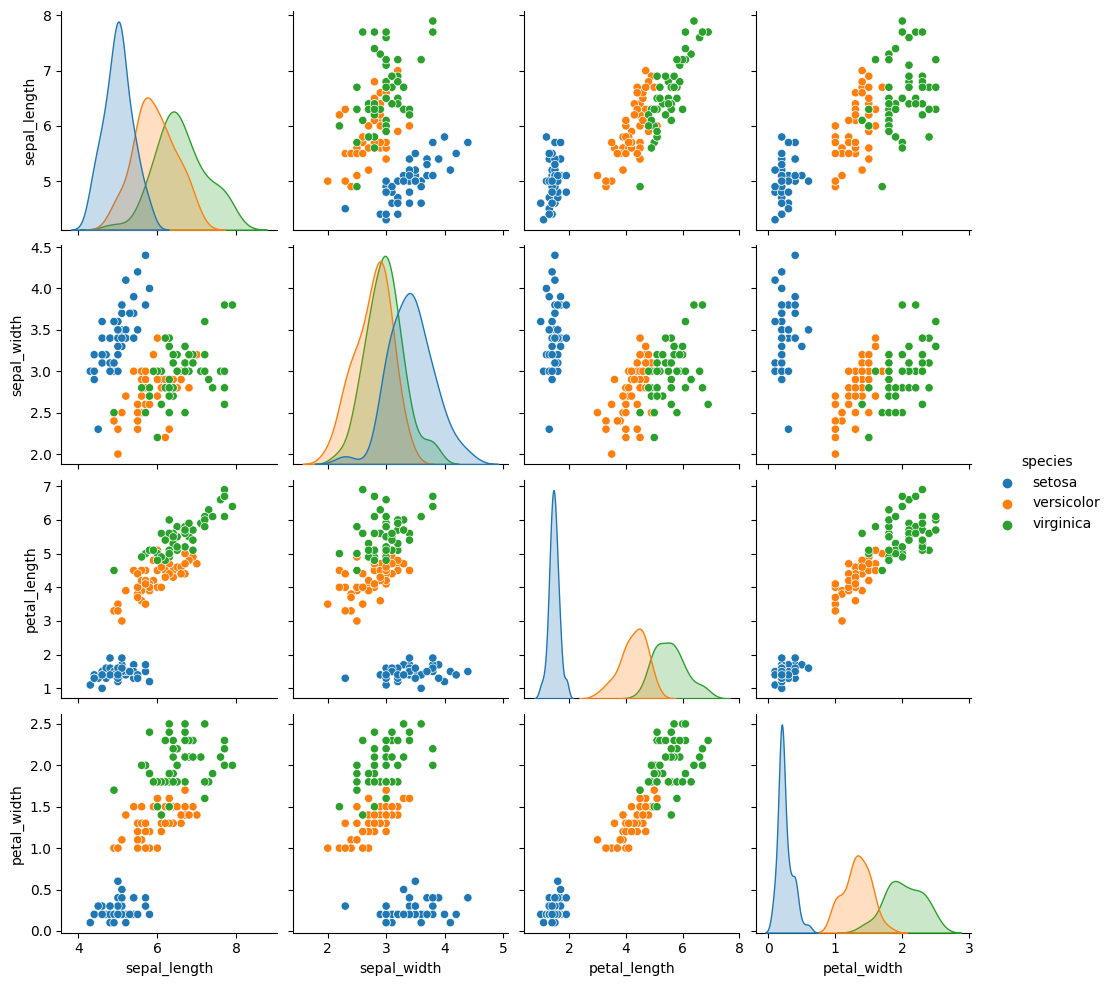

In [10]:
sns.pairplot(data=iris,hue='species')


In [11]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
#Label Encoding
iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

<Axes: >

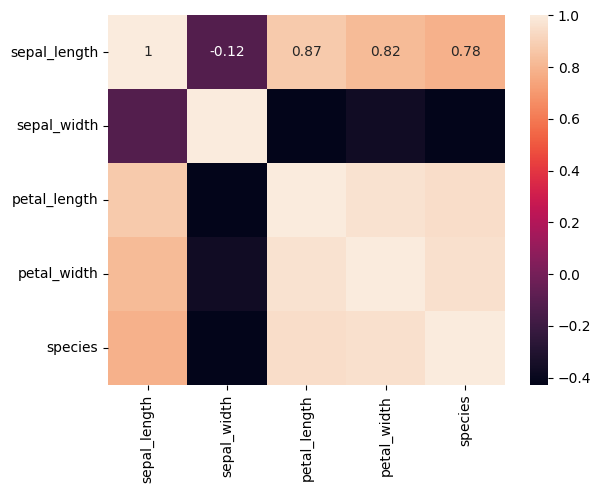

In [77]:
# Correlation matrix
sns.heatmap(iris.corr(),annot=True)

In [78]:
# Divided the data into target or feature
target = iris['species']
df1 = iris.copy()
df1 = df1.drop('species',axis=1)


In [79]:
# Label Encoding for categorical into numerical , because computer understand number
le = LabelEncoder()
y = le.fit_transform(target)
x = df1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

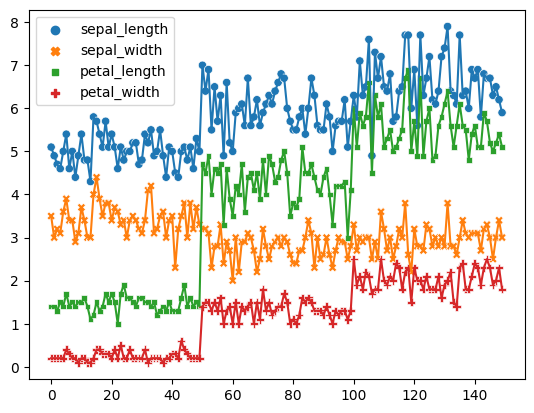

In [44]:
sns.scatterplot(x)
plt.plot(x)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=40)

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtree.predict(x_test)

In [47]:
x_test.head()

sepal_length  sepal_width  petal_length  petal_width
38            4.4          3.0           1.3          0.2
66            5.6          3.0           4.5          1.5
115           6.4          3.2           5.3          2.3
117           7.7          3.8           6.7          2.2
89            5.5          2.5           4.0          1.3

In [60]:
dtree.predict([[4.4,3.0,1.3,0.2]])
dtree.predict([[5.6,3.0,4.5,1.5]])
dtree.predict([[6.4,3.2,5.3,2.3]])
dtree.predict([[7.7,3.8,6.7,2.2]])
dtree.predict([[5.5,2.5,4.0,1.3]])
dtree.predict([[5.6,3.5,5.0,1.3]]) # changing for testing 

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feat

array([2], dtype=int64)

In [50]:
y_test

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [25]:
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

0.0

In [26]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [27]:
print('\n',classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
accuracy_score(y_test,y_pred)

1.0

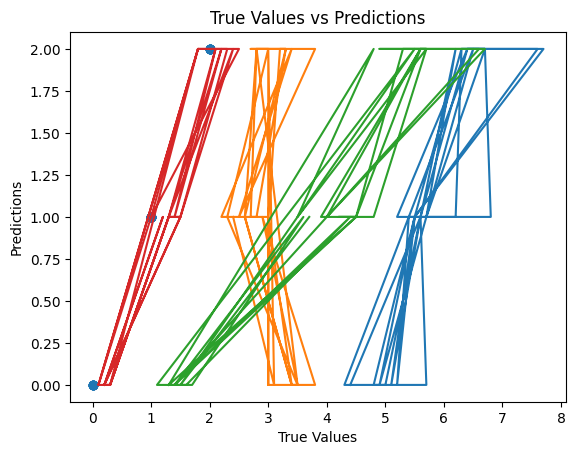

In [45]:
plt.scatter(y_test, y_pred)
plt.plot(x_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

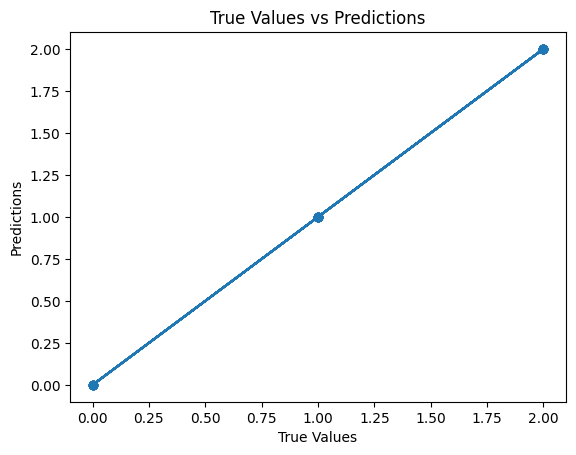

In [46]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [66]:
# iris['species'].unique

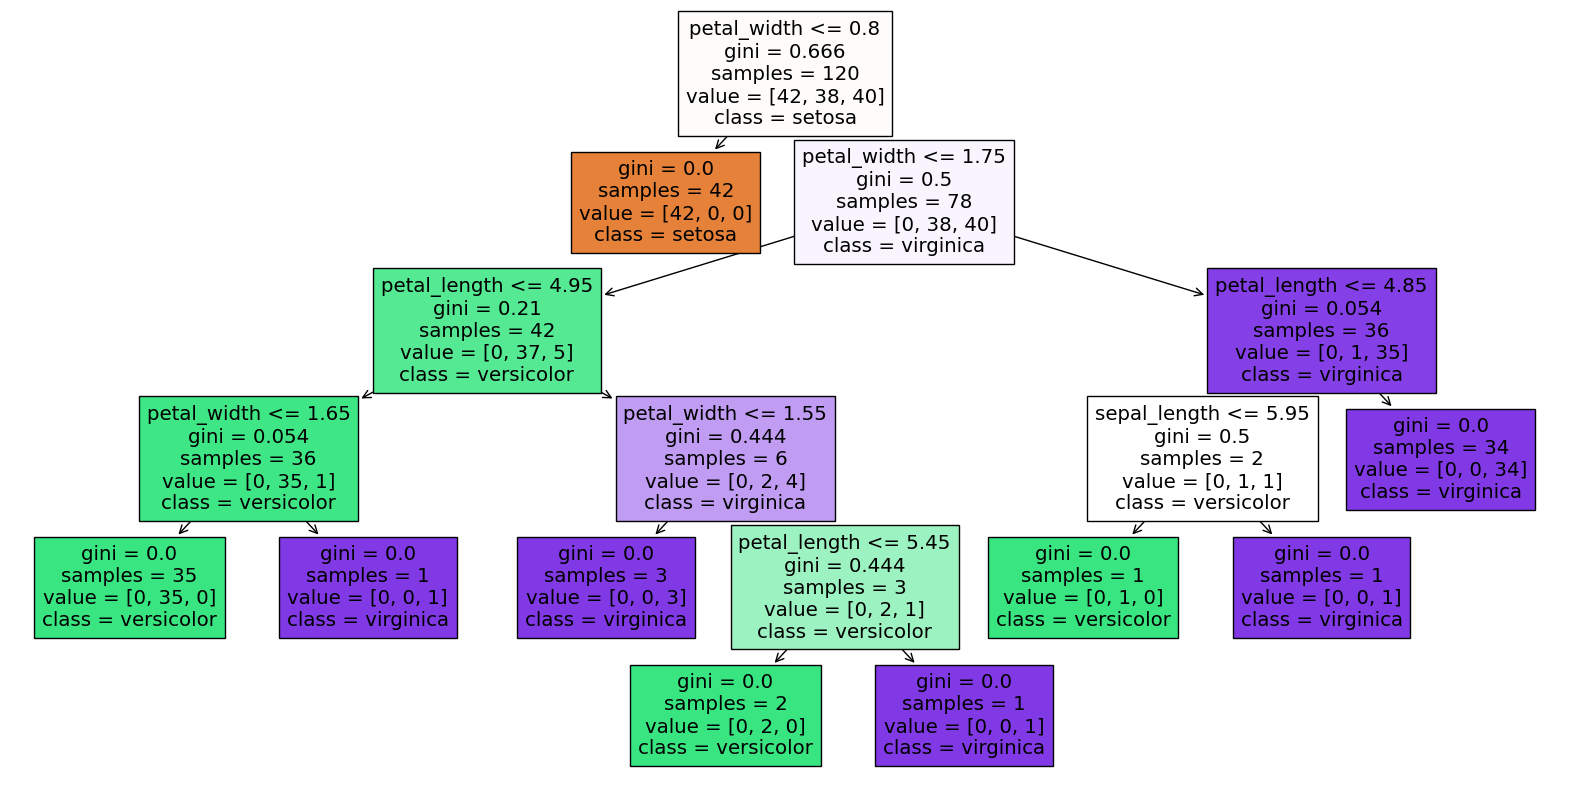

In [70]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=x.columns,class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('tree.png')

In [81]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
y_pred = dtree.predict(x_test)

In [83]:
x_test.head()

sepal_length  sepal_width  petal_length  petal_width
38            4.4          3.0           1.3          0.2
66            5.6          3.0           4.5          1.5
115           6.4          3.2           5.3          2.3
117           7.7          3.8           6.7          2.2
89            5.5          2.5           4.0          1.3

In [84]:
y_test

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [88]:
dtree.predict([[4.4,3.0,1.3,0.2]])
dtree.predict([[5.6,3.0,4.5,1.5]])
dtree.predict([[6.4,3.2,5.3,2.3]])
dtree.predict([[7.7,3.8,6.7,2.2]])
dtree.predict([[5.5,2.5,4.0,1.3]])
dtree.predict([[5.6,3.5,5.0,1.3]]) # changing for testing 

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature 

array([2.])

In [85]:
x_train

sepal_length  sepal_width  petal_length  petal_width
62           6.0          2.2           4.0          1.0
23           5.1          3.3           1.7          0.5
26           5.0          3.4           1.6          0.4
48           5.3          3.7           1.5          0.2
2            4.7          3.2           1.3          0.2
..           ...          ...           ...          ...
71           6.1          2.8           4.0          1.3
12           4.8          3.0           1.4          0.1
50           7.0          3.2           4.7          1.4
7            5.0          3.4           1.5          0.2
70           5.9          3.2           4.8          1.8

[120 rows x 4 columns]

In [86]:
y_train

array([1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 1], dtype=int64)

In [89]:
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(0.0, 0.0)

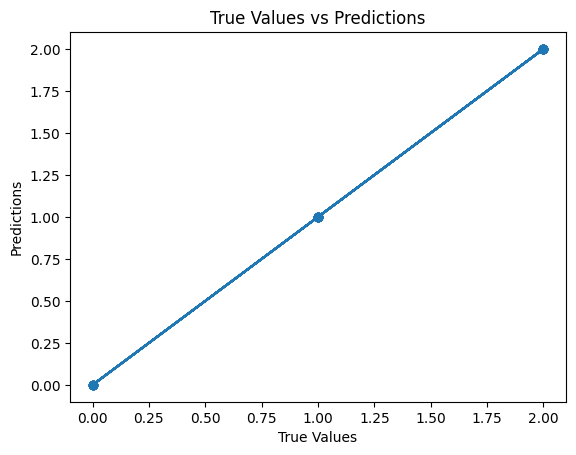

In [90]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

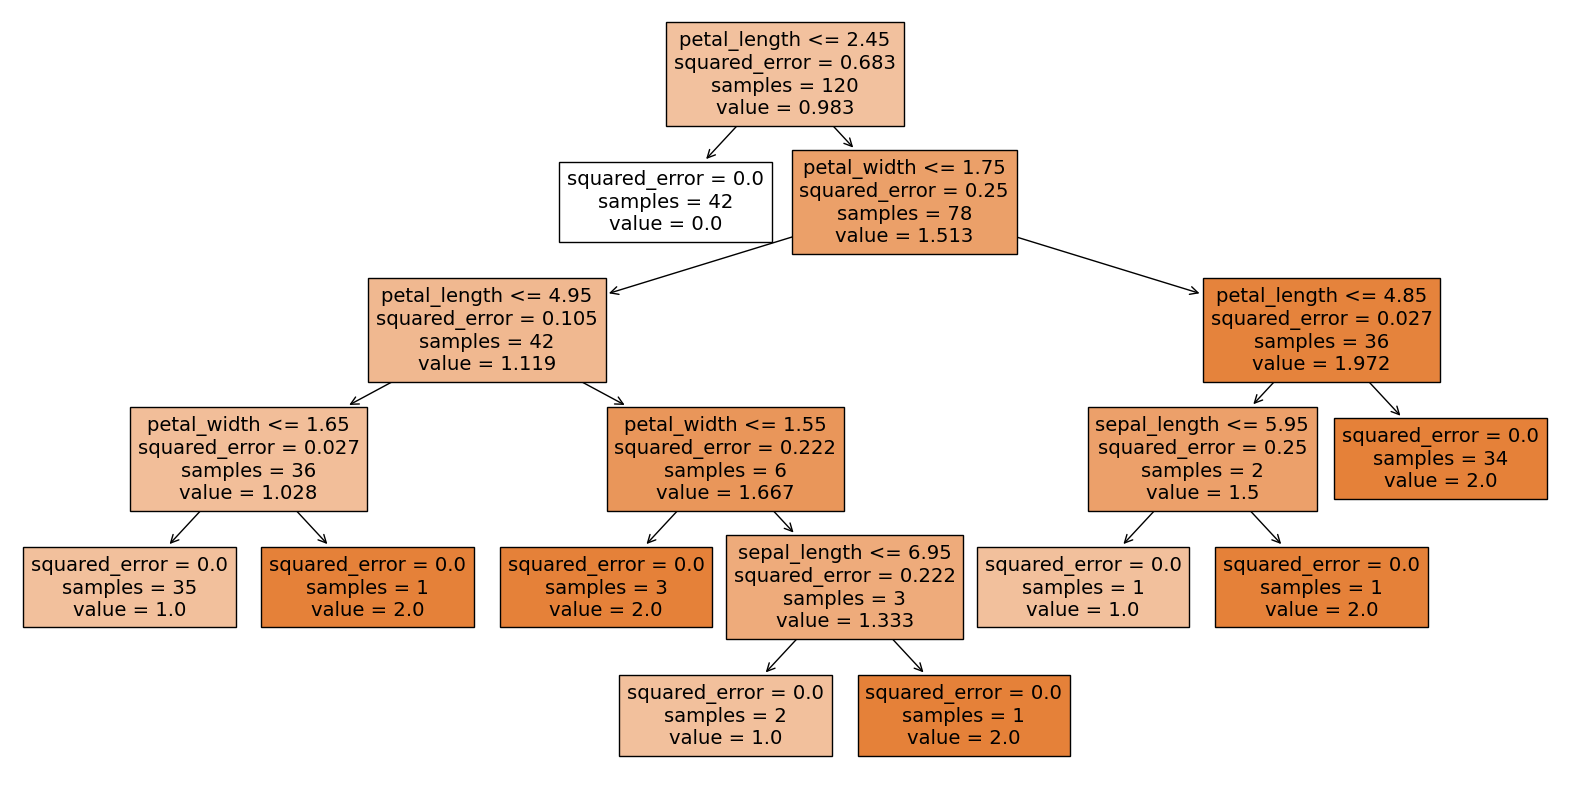

In [91]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=x.columns,class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('tree.png')

In [2]:
# Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor,RandomTreesEmbedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [46]:
#dataset = sns.load_dataset('penguins')
dataset= pd.read_csv('penguins_lter.csv')
dataset.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [4]:
# Analaytics the Data:- 
dataset.size

5848

In [5]:
dataset.shape

(344, 17)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [47]:
dataset.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [48]:
# Remove Unexpected Columns:- 
dataset.drop(columns=['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments'],axis=1,inplace=True)

In [49]:
dataset.head()

Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.1   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.5   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen                40.3   
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen                 NaN   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen                36.7   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  
0               18.7                181.0         3750.0    MALE  
1               17.4                186.0         3800.0  FEMALE  
2               18.0                195.0         3250.0  FEMALE  
3                NaN                  NaN            NaN     NaN  
4               19.3                193.0         3450.0  FEMALE

In [50]:
# Clean The Data:- 
dataset['Species'].unique()
# dataset['Island'].unique()
# dataset['Species'].unique()
# dataset['Sex'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [51]:
# Replace . value by FEMALE ( by-default)

dataset.at[336,'Sex'] = 'FEMALE'

In [52]:
# Remove Null Value 
dataset.dropna(inplace=True)

In [53]:
dataset.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [20]:
dataset.size

2338

In [54]:
dataset.head()

Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.1   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.5   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen                40.3   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen                36.7   
5  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.3   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  
0               18.7                181.0         3750.0    MALE  
1               17.4                186.0         3800.0  FEMALE  
2               18.0                195.0         3250.0  FEMALE  
4               19.3                193.0         3450.0  FEMALE  
5               20.6                190.0         3650.0    MALE

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flipper Length (mm)', ylabel='Count'>

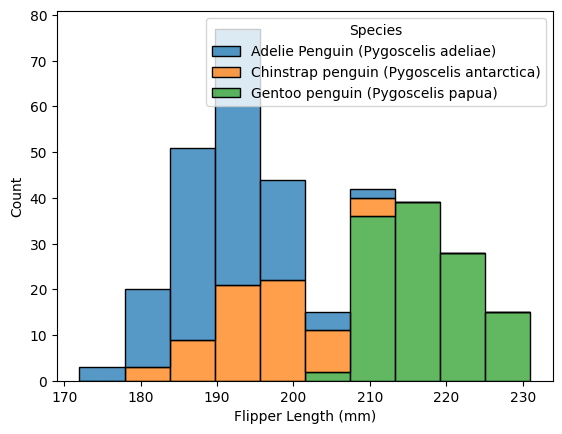

In [55]:
sns.histplot(data=dataset, x="Flipper Length (mm)", hue="Species", multiple="stack")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flipper Length (mm)', ylabel='Density'>

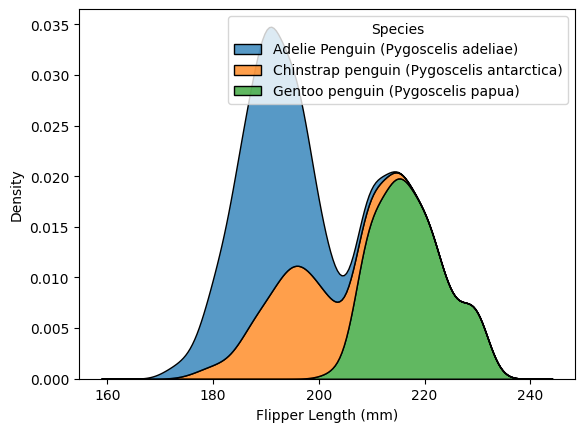

In [56]:
sns.kdeplot(data=dataset, x="Flipper Length (mm)", hue="Species", multiple="stack")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


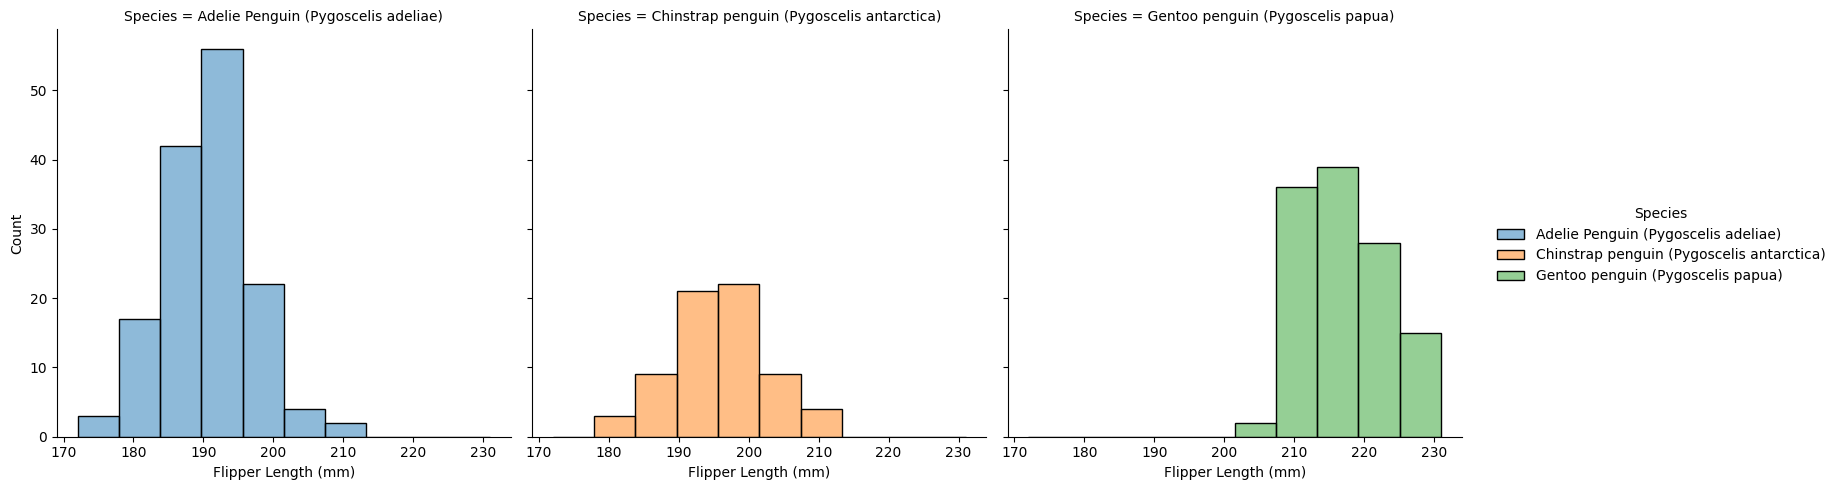

In [57]:
sns.displot(data=dataset, x="Flipper Length (mm)", hue="Species", col="Species")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


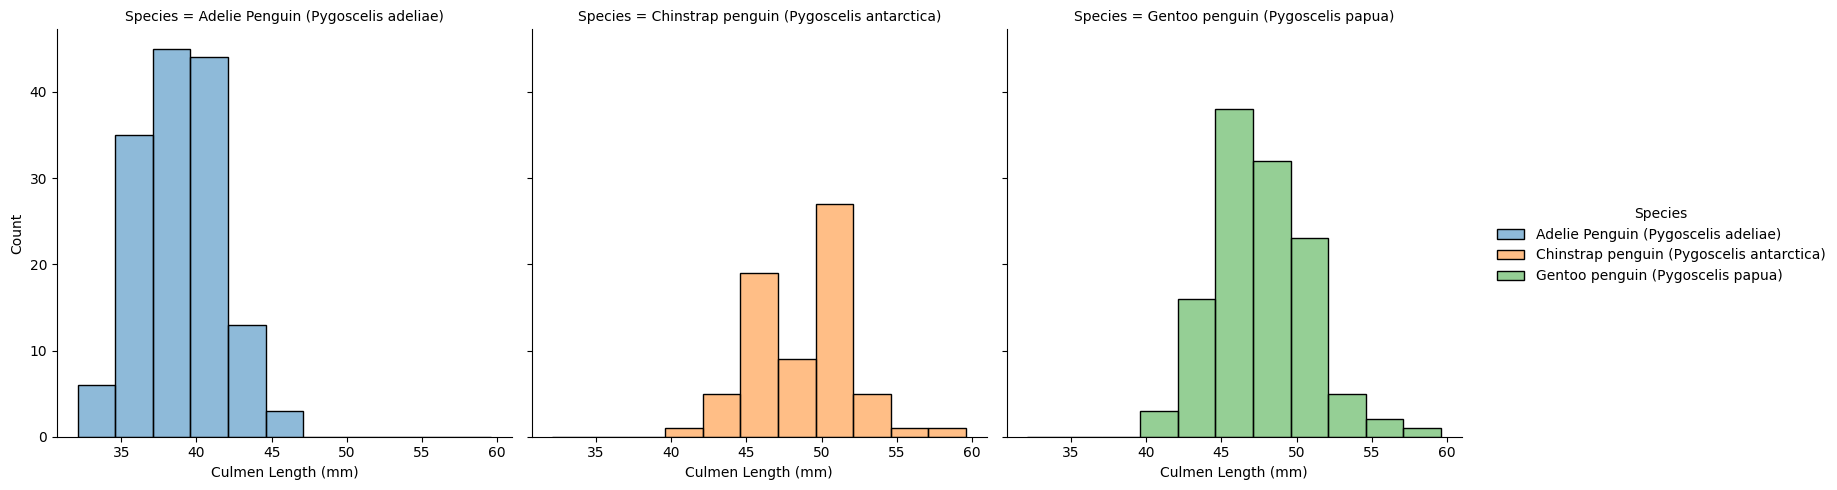

In [58]:
sns.displot(data=dataset, x="Culmen Length (mm)", hue="Species", col="Species")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


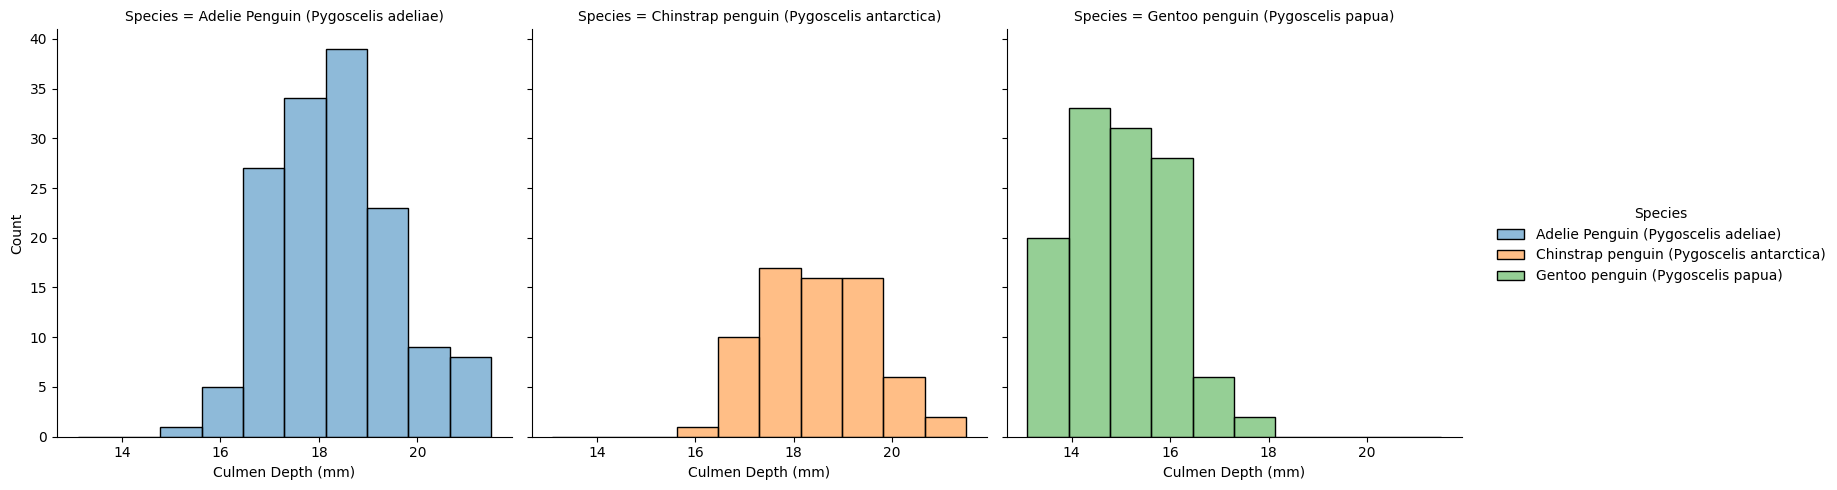

In [59]:
sns.displot(data=dataset, x="Culmen Depth (mm)", hue="Species", col="Species")

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


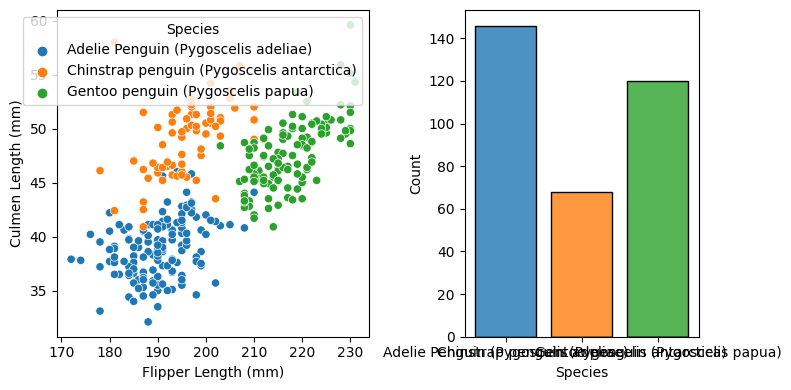

In [60]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=dataset, x="Flipper Length (mm)", y="Culmen Length (mm)", hue="Species", ax=axs[0])
sns.histplot(data=dataset, x="Species", hue="Species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

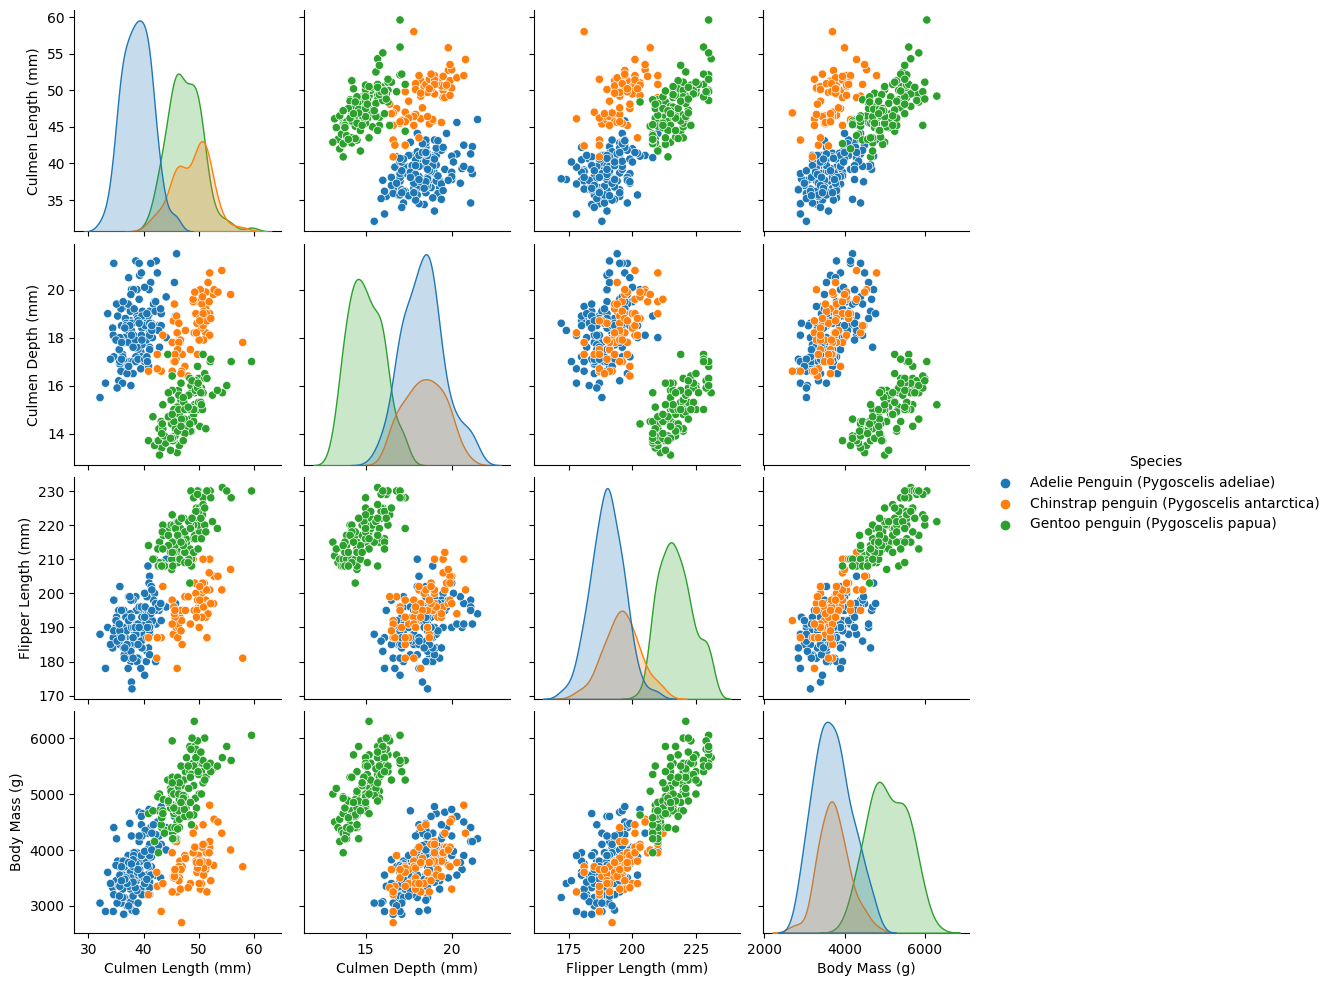

In [61]:
sns.pairplot(dataset,hue='Species')

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

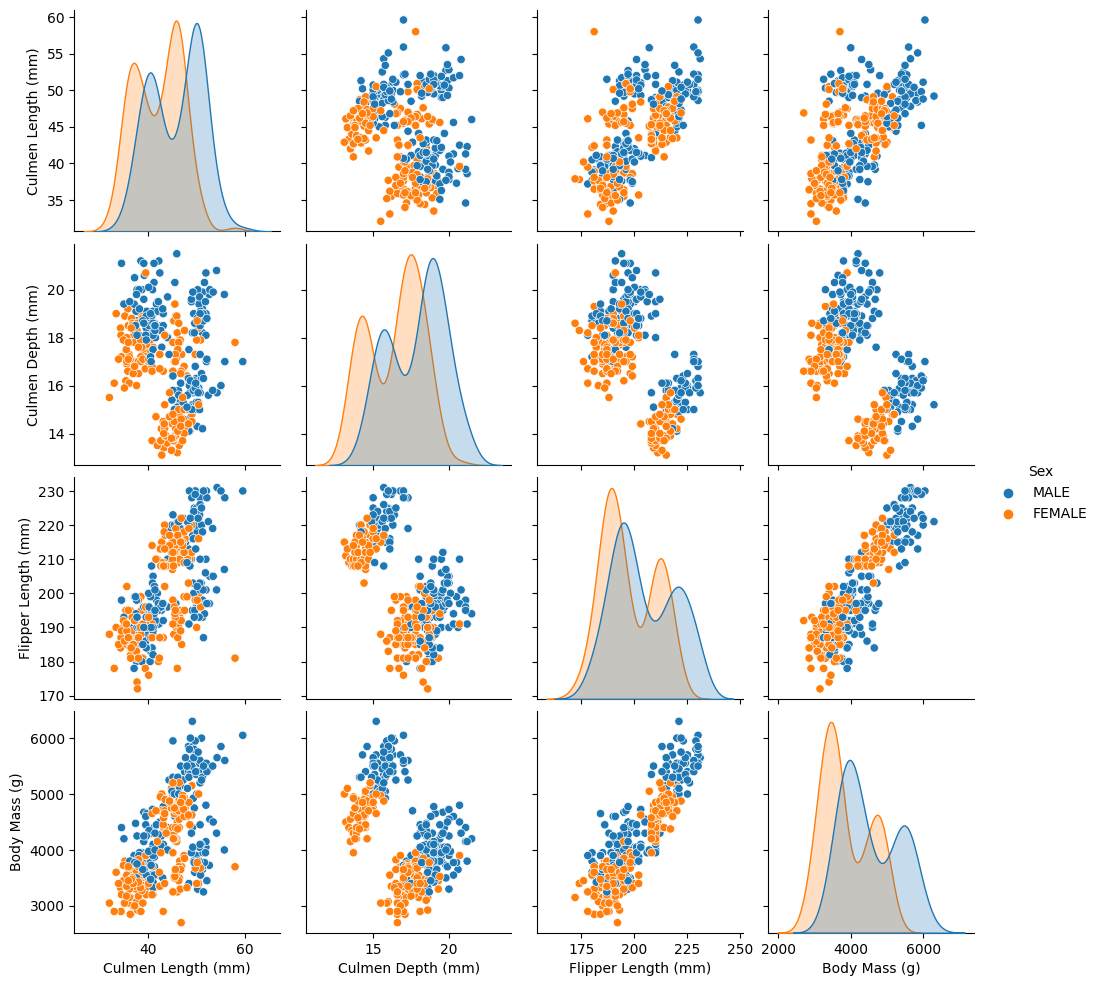

In [62]:
sns.pairplot(dataset,hue='Sex')

In [63]:
# Convert Into Categories Value into Numerical Value:- 
# Also Used OneHot Encoding:- 
dataset['Sex'] = dataset['Sex'].map({'MALE':0,'FEMALE':1})

dataset['Species'] = dataset['Species'].map({'Adelie Penguin (Pygoscelis adeliae)':0,'Chinstrap penguin (Pygoscelis antarctica)':1,'Gentoo penguin (Pygoscelis papua)':2})

dataset['Island'] = dataset['Island'].map({'Torgersen':0,'Biscoe':1,'Dream':2})

In [65]:
dataset['Species'].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='Species', ylabel='Flipper Length (mm)'>

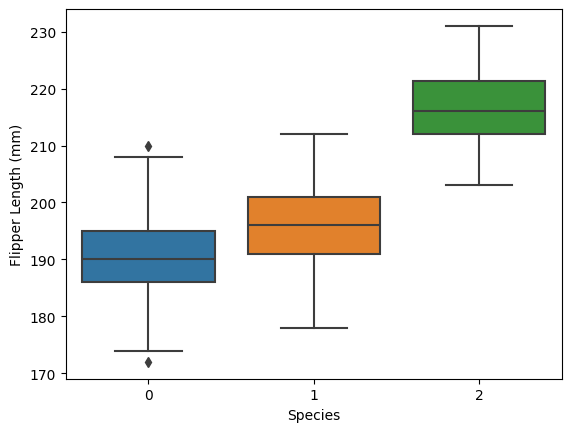

In [66]:
sns.boxplot(data=dataset,x='Species',y='Flipper Length (mm)')

<Axes: >

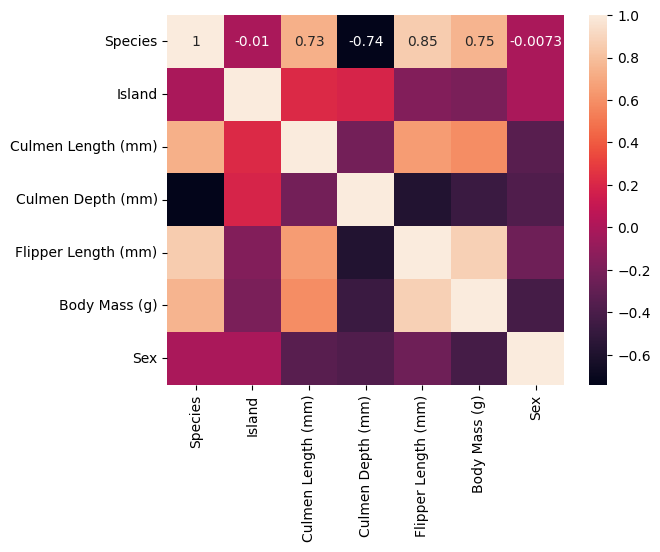

In [67]:
sns.heatmap(data = dataset.corr(),annot=True)

In [68]:
dataset.head()

Species  Island  Culmen Length (mm)  Culmen Depth (mm)  \
0        0       0                39.1               18.7   
1        0       0                39.5               17.4   
2        0       0                40.3               18.0   
4        0       0                36.7               19.3   
5        0       0                39.3               20.6   

   Flipper Length (mm)  Body Mass (g)  Sex  
0                181.0         3750.0    0  
1                186.0         3800.0    1  
2                195.0         3250.0    1  
4                193.0         3450.0    1  
5                190.0         3650.0    0

In [69]:
# Split the Dataset into Train & Test:- 

x= dataset.iloc[:,1:]
x

Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0         0                39.1               18.7                181.0   
1         0                39.5               17.4                186.0   
2         0                40.3               18.0                195.0   
4         0                36.7               19.3                193.0   
5         0                39.3               20.6                190.0   
..      ...                 ...                ...                  ...   
338       1                47.2               13.7                214.0   
340       1                46.8               14.3                215.0   
341       1                50.4               15.7                222.0   
342       1                45.2               14.8                212.0   
343       1                49.9               16.1                213.0   

     Body Mass (g)  Sex  
0           3750.0    0  
1           3800.0    1  
2           3250.0    1  
4           3450.0    1  
5           3650.0    0  
..             ...  ...  
338         4925.0    1  
340         4850.0    1  
341         5750.0    0  
342         5200.0    1  
343         5400.0    0  

[334 rows x 6 columns]

In [70]:
y = dataset['Species']
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: Species, Length: 334, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [83]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (223, 6)
X_test: (111, 6)
y_train: (223,)
y_test: (111,)


In [73]:
classify = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=0)
classify.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [87]:
classify = RandomForestClassifier(n_estimators=7,criterion='gini',random_state=0)
classify.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [88]:
y_pred = classify.predict(X_test)
y_pred

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       0], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred)*100

99.09909909909909

In [90]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 38]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        38

    accuracy                           0.99       111
   macro avg       0.99      0.98      0.99       111
weighted avg       0.99      0.99      0.99       111



In [96]:
#KNN 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import sklearn.datasets as ds

In [99]:
# Load Dataset :- 

df = ds.load_breast_cancer()
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [108]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [100]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [101]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [103]:
df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [110]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [106]:
# Final Data Fram 

data = pd.DataFrame(df.data,columns=df.feature_names)
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [116]:
df_target = pd.DataFrame(df.target,columns=['Cancer'])
df_target

Cancer
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]

In [112]:
# sns.load_dataset('load_breast_cancer')

In [113]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss = StandardScaler()
ss.fit(data)

StandardScaler()

In [120]:
scaler_data = pd.DataFrame(ss.transform(data),columns=df.feature_names)
scaler_data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  ...  worst radius  worst texture  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     worst concavity  worst concave points  worst symmetry  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

In [136]:
# Split dataset into train and test ( 70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(df_target), test_size=0.30, random_state=105)

In [137]:
# USE KNN 

knn = KNeighborsClassifier(n_neighbors=1)

In [139]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [140]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [141]:
accuracy_score(y_test,y_pred)

0.935672514619883

In [142]:
confusion_matrix(y_test,y_pred)

array([[ 52,   7],
       [  4, 108]], dtype=int64)

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.94      0.96      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [144]:
np.mean(y_pred !=y_test)

0.06432748538011696

In [145]:
# Find K Value:- 
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_test)
    error_rate.append(np.mean(y_pred1 != y_test))

In [146]:
error_rate

[0.06432748538011696,
 0.08187134502923976,
 0.07602339181286549,
 0.07017543859649122,
 0.08771929824561403,
 0.08187134502923976,
 0.07602339181286549,
 0.06432748538011696,
 0.06432748538011696,
 0.05847953216374269,
 0.07017543859649122,
 0.07017543859649122,
 0.07602339181286549,
 0.07602339181286549,
 0.08187134502923976,
 0.07017543859649122,
 0.08187134502923976,
 0.07017543859649122,
 0.07602339181286549,
 0.07017543859649122,
 0.08187134502923976,
 0.08187134502923976,
 0.08187134502923976,
 0.07602339181286549,
 0.08187134502923976,
 0.07602339181286549,
 0.08771929824561403,
 0.08187134502923976,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.07602339181286549,
 0.08771929824561403,
 0.08187134502923976,
 0.08187134502923976]

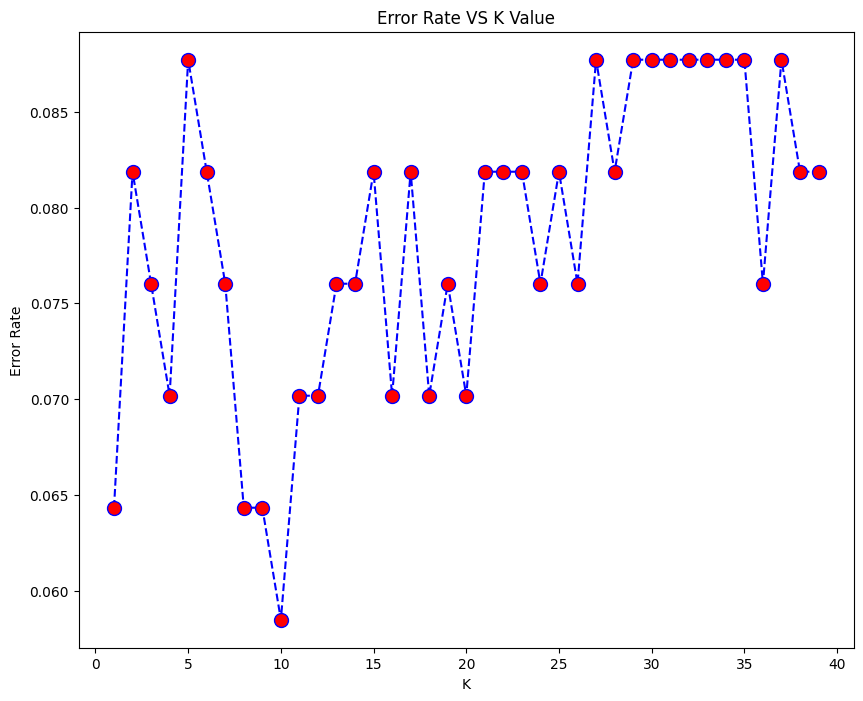

In [154]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [157]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K = 10')
print('\n')
print(accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))


K = 10


0.935672514619883


[[ 52   7]
 [  4 108]]


              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.94      0.96      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [161]:
from IPython.display import Image
Image(url='https://en.wikipedia.org/wiki/File:Irissetosa1.jpg',height=30,width=30)

In [201]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

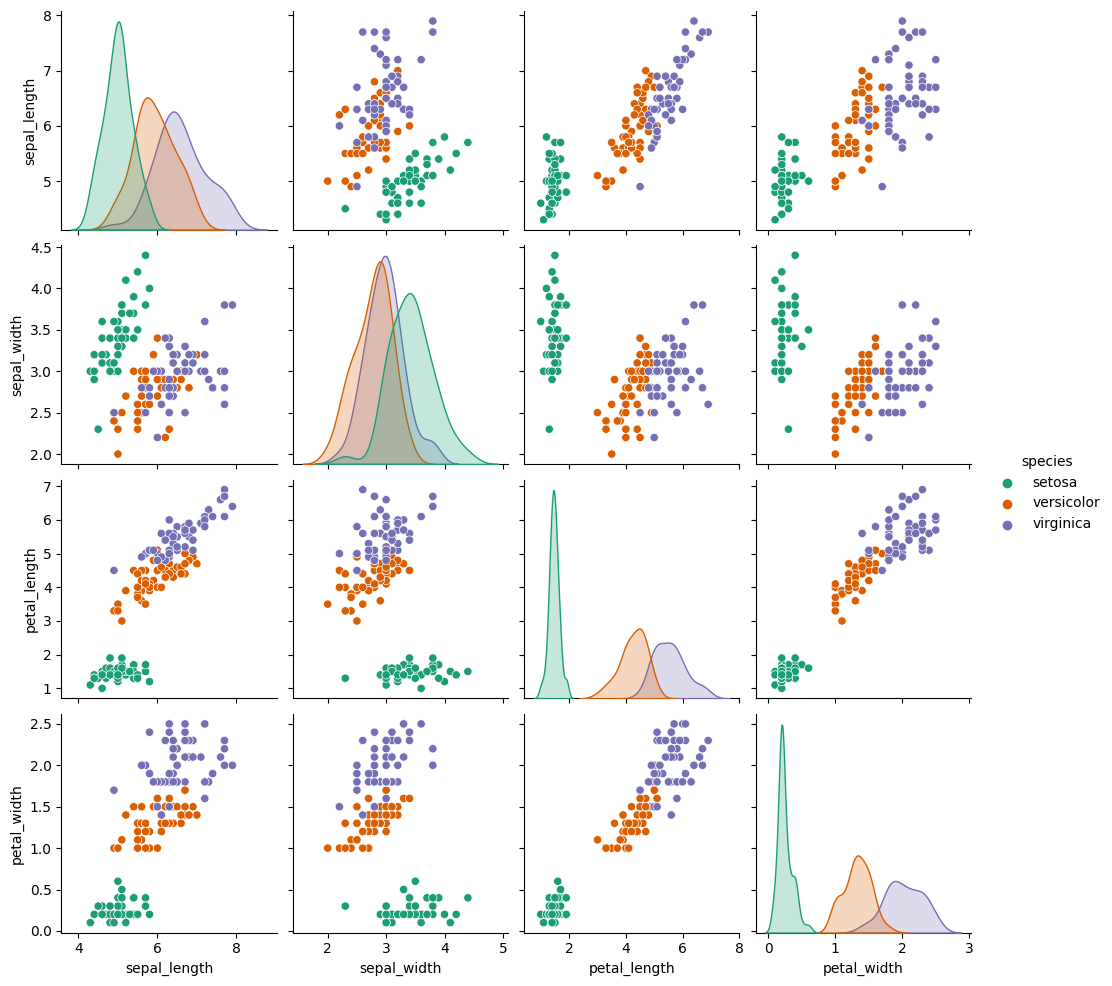

In [202]:
# EDA 
sns.pairplot(data= iris,hue='species',palette='Dark2')

In [203]:
setosa = iris[iris.species=='setosa']
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

In [204]:
iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [205]:
iris.species.unique()

array([0, 1, 2], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15960\789986518.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=setosa['sepal_length'],
C:\Users\DELL\AppData\Local\Temp\ipykernel_15960\789986518.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa['sepal_length'],
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future vers

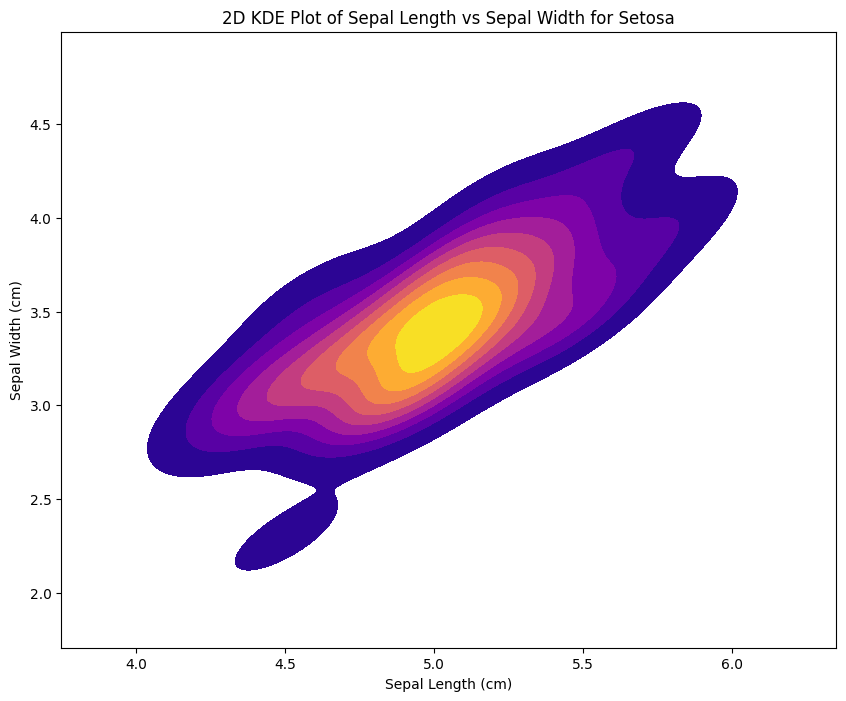

In [206]:
# Create the plot
plt.figure(figsize=(10, 8))
sns.kdeplot(x=setosa['sepal_length'], 
            y=setosa['sepal_width'],
            cmap='plasma',
            shade=True,
            shade_lowest=False)

plt.title('2D KDE Plot of Sepal Length vs Sepal Width for Setosa')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

In [207]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [208]:
x = iris.iloc[:,:-1]
y = iris['species']

In [209]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [210]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [211]:
scaler_data = pd.DataFrame(ss.transform(x),columns=x.columns)
scaler_data

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [212]:
# Split dataset into train and test ( 70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(scaler_data, y, test_size=0.30, random_state=105)

In [216]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred
# print('K = 1')
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print('\n')
# print(confusion_matrix(y_test,y_pred))
# print('\n')
# print(classification_report(y_test,y_pred))


array([2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2], dtype=int64)

In [217]:
accuracy_score(y_test,pred)

0.9777777777777777

In [218]:
confusion_matrix(y_test,pred)

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 17]], dtype=int64)

In [219]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      0.94      0.97        16\n           2       0.94      1.00      0.97        17\n\n    accuracy                           0.98        45\n   macro avg       0.98      0.98      0.98        45\nweighted avg       0.98      0.98      0.98        45\n'

In [214]:
pred

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2], dtype=int64)

In [221]:
# Find K Value:- 
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_test)
    error_rate.append(np.mean(y_pred1 != y_test))

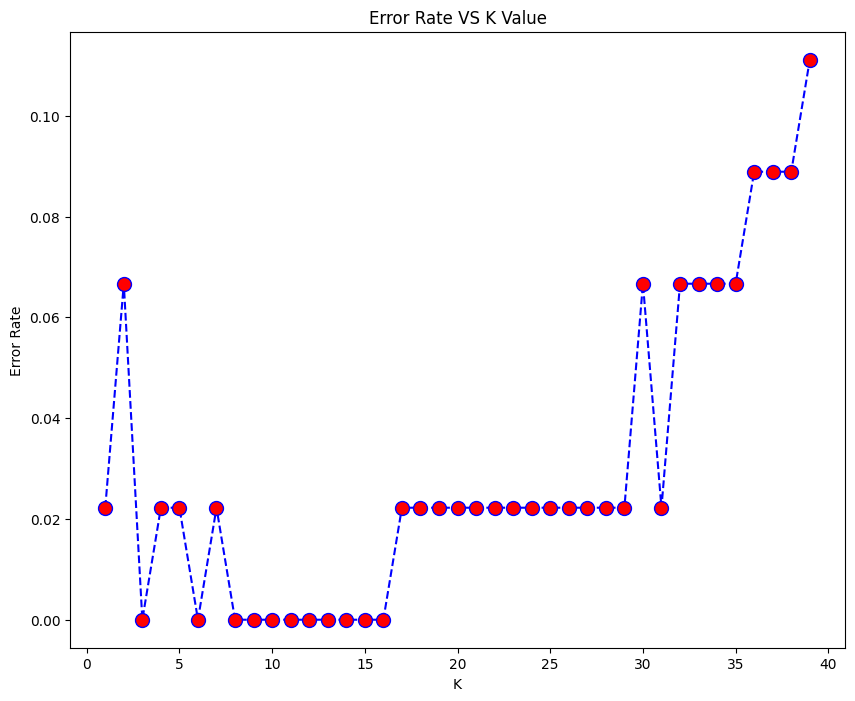

In [222]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [220]:
accuracy_score(y_test,pred)
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# Naive Baye's 
# GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv('golf_df.csv')
df

Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [4]:
df1 = df.apply(lambda x: pd.factorize(x)[0] if x.dtype in ['object','bool'] else x)
df1.head()

Outlook  Temperature  Humidity  Windy  Play
0        0            0         0      0     0
1        0            0         0      1     0
2        1            0         0      0     1
3        2            1         0      0     1
4        2            2         1      0     1

In [37]:
df = df.apply(lambda x: x.astype('category'))
df1 = df.apply(lambda x : x.cat.codes)
df1.head()

Outlook  Temperature  Humidity  Windy  Play
0        2            1         0      0     0
1        2            1         0      1     0
2        0            1         0      0     1
3        1            2         0      0     1
4        1            0         1      0     1

In [5]:
x = df1.iloc[:10]
x

Outlook  Temperature  Humidity  Windy  Play
0        0            0         0      0     0
1        0            0         0      1     0
2        1            0         0      0     1
3        2            1         0      0     1
4        2            2         1      0     1
5        2            2         1      1     0
6        1            2         1      1     1
7        0            1         0      0     0
8        0            2         1      0     1
9        2            1         1      0     1

In [6]:
y = df1.iloc[-4:]
y

Outlook  Temperature  Humidity  Windy  Play
10        0            1         1      1     1
11        1            1         0      1     1
12        1            0         1      0     1
13        2            1         0      1     0

In [7]:
# Train & test split 
y_train = x.pop('Play')
X_train = x 

y_test = y.pop('Play')
X_test = y

In [9]:
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [10]:
NB.predict(X_test)

array([0, 0, 1, 1], dtype=int64)

In [11]:
NB.predict([[0,0,0,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [12]:
X_test

Outlook  Temperature  Humidity  Windy
10        0            1         1      1
11        1            1         0      1
12        1            0         1      0
13        2            1         0      1

In [13]:
y_test

10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [14]:
f'Training Score: {NB.score(X_train,y_train)*100}'

'Training Score: 60.0'

In [62]:
f'Testing Score: {NB.score(X_test,y_test)*100}'

'Testing Score: 25.0'

In [3]:
# SVM ( Support Vector machine )

data = sns.load_dataset('iris')
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [19]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
data['species'] = data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [26]:
data = data[data['species'].isin([0,1])]
data.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [3]:
import sklearn.datasets as sd


df = sd.load_iris()
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
x = df['data'][:,(2,3)]   # petal_length , petal_width
y = df['target']

<Axes: xlabel='petal_length', ylabel='petal_width'>

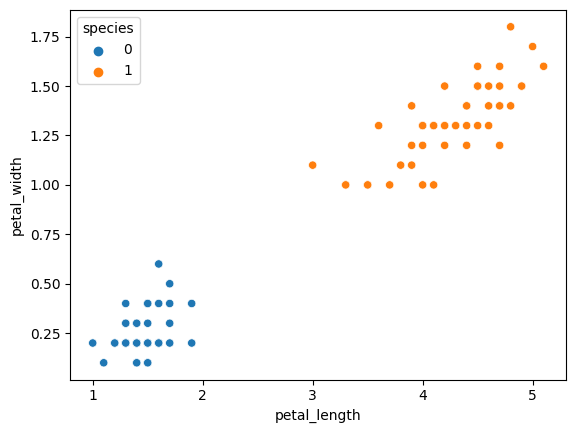

In [27]:
sns.scatterplot(x=data['petal_length'],y=data['petal_width'],hue=data['species'])

In [5]:
setosa_or_versicolor = (y==0) | (y==1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

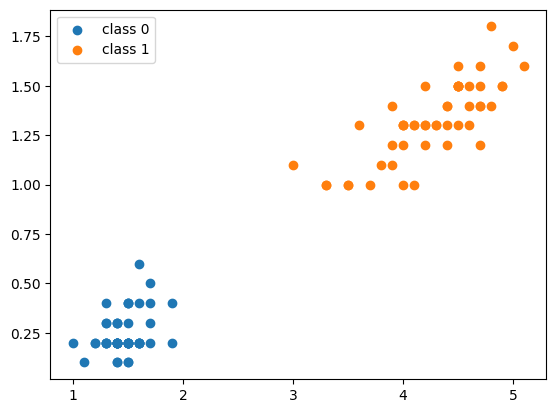

In [6]:
plt.scatter(x[:,0][y==0],x[:,1][y==0],label='class 0')
plt.scatter(x[:,0][y==1],x[:,1][y==1],label='class 1')
plt.legend()
plt.show()

In [9]:
import sys

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000, 10000, 100000]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X, y)

best_svm = grid_search.best_estimator_

In [36]:
# x = data[['petal_length','petal_width']]
# y = data[['species']]


In [7]:
svm = SVC(kernel='linear',C=sys.float_info.max) # poly , rbf, sigmoid and etc.....
# C=1e10  , # or even larger, like 1e15

#svm = LinearSVC(C=1e15, loss='hinge')

In [8]:
svm.fit(x,y)

SVC(C=1.7976931348623157e+308, kernel='linear')

In [9]:
svm.intercept_

array([-3.78823471])

In [10]:
svm.coef_

array([[1.29411744, 0.82352928]])

In [11]:
def plot_decision_boundary_by_svc(svc,xmin,xmax):
    w = svm.coef_[0]
    b = svm.intercept_[0]
    # Decision Boundary:- w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    
    x0 =np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # plt.plot(x0,decision_boundary, color='k',label='Decision Boundary')
    # plt.scatter(x,y,c=y, cmap='rainbow',s=50)
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin 
    gutter_down = decision_boundary - margin
    
    svs = svm.support_vectors_ # This gets the support vectors from your SVM model.
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolor='#FFAAAA') # Highlight Support Vectors 
    #This plots the support vectors as scatter points with a light red color and larger size.
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    #This plots the decision boundary as a solid black line with a width of 2.
    # plt.plot(x0,gutter_up,linestyle='--',linewidth=2)
    # plt.plot(x0,gutter_down,linestyle='--',linewidht=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    #This plots the upper margin (gutter) as a dashed black line with a width of 2.
    plt.plot(x0,gutter_down,'k--',linewidth=2)
    #This plots the lower margin (gutter) as a dashed black line with a width of 2.

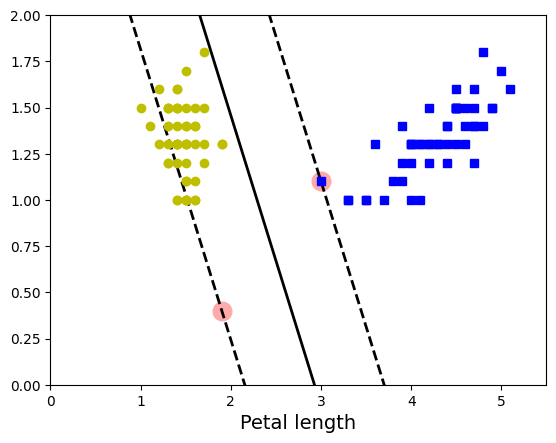

In [12]:
plot_decision_boundary_by_svc(svm,0,5.5)
#This is likely a custom function that plots the decision boundary of your SVM model. 
# It takes the SVM model and the x-axis range as arguments.
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
#This plots blue squares ('bs') for data points where y=1.
plt.plot(x[:,0][y==0],x[:,1][y==1],'yo')
#This plots yellow circles ('yo') for data points where y=-1.
plt.xlabel('Petal length',fontsize=14)
#This sets the x-axis label to 'Petal length' with a font size of 14.
plt.axis([0,5.5,0,2])
#This sets the axis limits. The correct syntax is to pass a list of [xmin, xmax, ymin, ymax].
plt.show()
#This displays the plot.

In [13]:
svm.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [ ]:
# x0, x1 = np.meshgrid(np.linspace(xmin, xmax, 100),
#                          np.linspace(xmin, xmax, 100))
#     Z = (w[0] * x0 + w[1] * x1 +b) * -1.0 / w[2]
#     plt.contour(x0, x1, Z, [0], colors='k', linewidth)

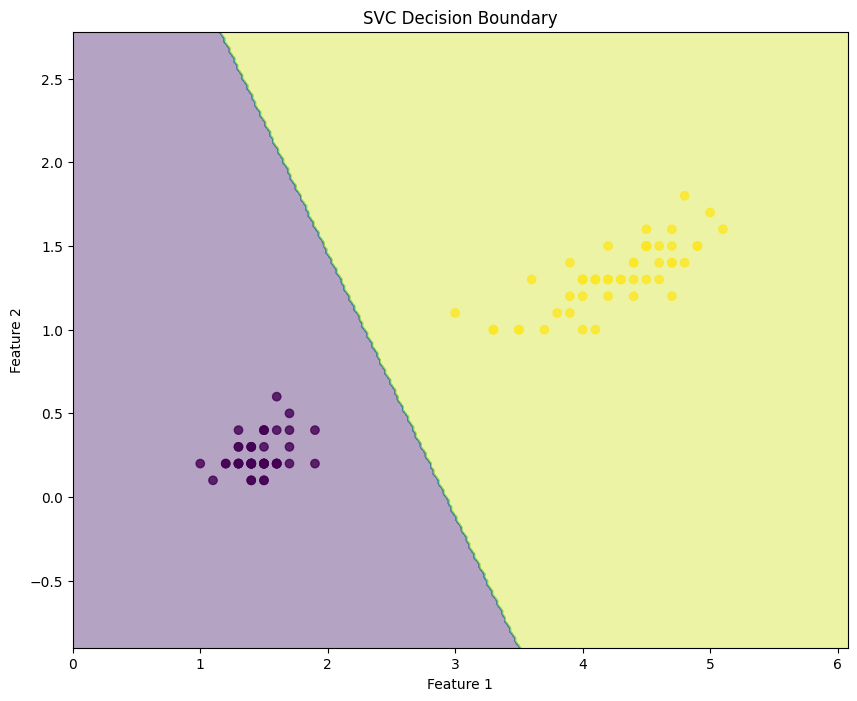

In [14]:
# Create a mesh grid to plot the decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Decision Boundary')
plt.show()

(-2.0, 2.0, -2.0, 2.0)

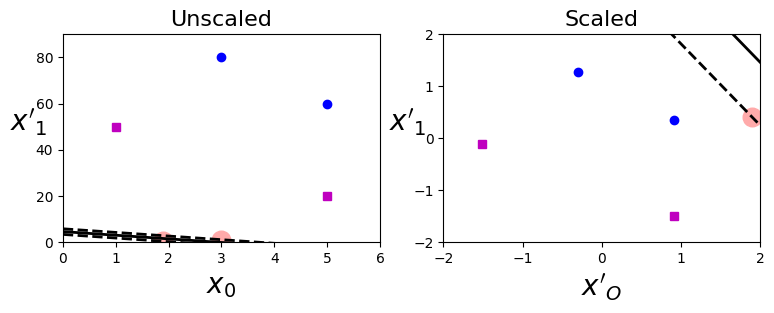

In [15]:
#Why Scaling is important

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64) 
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel="linear", C=100)

svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))

plt.subplot(121)


plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")

plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

plot_decision_boundary_by_svc(svm_clf, 0, 6)

plt.xlabel("$x_0$", fontsize=20)

plt.ylabel("$x'_1$ ", fontsize=20, rotation=0)

plt.title("Unscaled", fontsize=16)

plt.axis([0, 6, 0, 90])


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(Xs) 
svm_clf.fit(X_scaled, ys)

plt.subplot(122)

plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")

plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")

plot_decision_boundary_by_svc(svm_clf, -2, 2)

plt.xlabel("$x'_O$", fontsize=20)

plt.ylabel("$x'_1$", fontsize=20, rotation=0)

plt.title("Scaled", fontsize=16)

plt.axis([-2, 2, -2, 2])

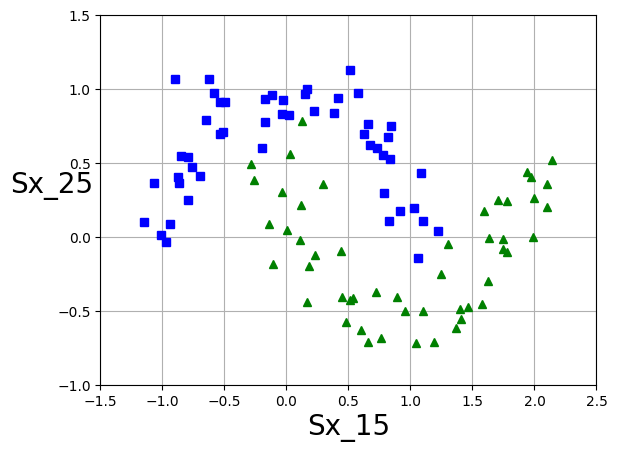

In [16]:
#Non Linear classifier

from sklearn.datasets import make_moons

X, y =make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"Sx_15", fontsize=20)
    plt.ylabel(r"Sx_25", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [17]:
#Introducing Pipeline

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64) 
ys=np.array([0, 0, 1, 1])

In [18]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [19]:
svm_pipline = Pipeline([ 
        ("scaler", StandardScaler()), 
        ("svm_clf_pipline", SVC(kernel='linear',C=100))
    ])

In [20]:
svm_pipline.fit(Xs,ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_pipline', SVC(C=100, kernel='linear'))])

In [21]:
svm_pipline['svm_clf_pipline']

SVC(C=100, kernel='linear')

(-2.0, 2.0, -2.0, 2.0)

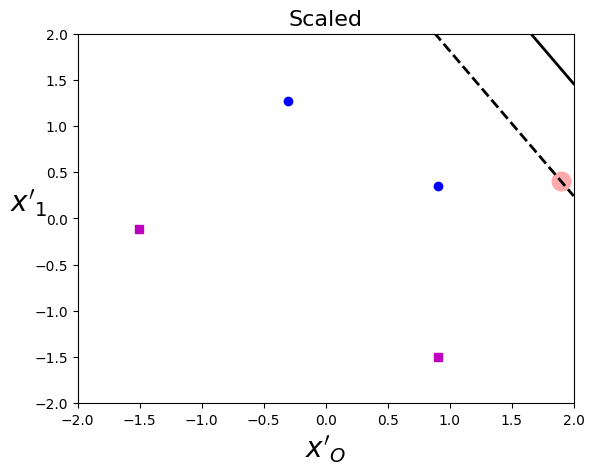

In [22]:
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")

plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")

plot_decision_boundary_by_svc(svm_pipline['svm_clf_pipline'], -2, 2)

plt.xlabel("$x'_O$", fontsize=20)

plt.ylabel("$x'_1$", fontsize=20, rotation=0)

plt.title("Scaled", fontsize=16)

plt.axis([-2, 2, -2, 2])

In [23]:
x = np.arange(1,4).reshape(-1,1)

pf= PolynomialFeatures(degree=2)

pf.fit_transform(x) #first is bias term, remaining columns are weight terms (x, x**2) as degrees = 2

pf = PolynomialFeatures(degree=3) #Degree 3 
pf.fit_transform(x)

#Bring back non-linear classifier data

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [25]:

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures (degree=3)), 
        ("scaler", StandardScaler()), 
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])


In [26]:
polynomial_svm_clf.fit(X, y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

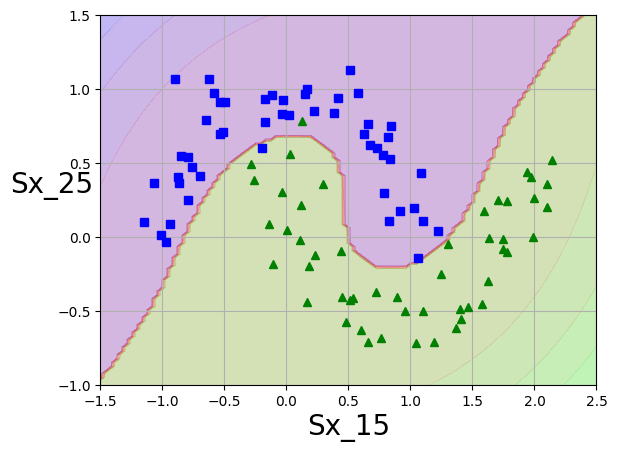

In [27]:
def plot_predictions (clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)

    x1s = np.linspace (axes [2], axes [3], 100)

    x0, x1 = np.meshgrid(x0s, x1s)

    X = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X).reshape(x0.shape)

    y_decision = clf.decision_function(X).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions (polynomial_svm_clf, [-1.5, 2.5, -1, 1.5]) 
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()